<a href="https://colab.research.google.com/github/jeongjinjoo/Big-Data-practice/blob/main/LH_Made_Cookies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
import pandas as pd
df = pd.read_csv('7.성남시_지식산업센터.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gbn            56 non-null     object 
 1   klg_ids_ct_nm  56 non-null     object 
 2   lon            56 non-null     float64
 3   lat            56 non-null     float64
 4   addr           56 non-null     object 
 5   rd_addr        56 non-null     object 
 6   useapr_day     56 non-null     object 
 7   use_area       56 non-null     object 
 8   arch_area      56 non-null     int64  
 9   tot_cpn        51 non-null     float64
 10  cpn_in_2101    41 non-null     float64
 11  cpn_in_2201    43 non-null     float64
 12  cpn_in_2302    47 non-null     float64
 13  cpn_in_2402    50 non-null     float64
 14  cpn_in_2406    49 non-null     float64
 15  rmrk           10 non-null     object 
dtypes: float64(8), int64(1), object(7)
memory usage: 7.1+ KB
None
        gbn klg_ids_ct_nm         lon 

In [ ]:
# 1. 결측치 확인
print(df.isnull().sum())

# 2. 중복 데이터 확인 및 제거 (필요시)
print(df.duplicated().sum()) # 중복데이터 : 0
# df = df.drop_duplicates()

# # 3. 데이터 타입 확인 및 변환
df['useapr_day'] = pd.to_datetime(df['useapr_day'], errors='coerce')  # 건축사용승인 날짜 변환

# 4. 결측치 처리
# 필요한 컬럼만 결측치 처리 방법 결정
df.fillna({'arch_area': 0, 'tot_cpn': 0, 'addr': '미상'}, inplace=True)


gbn               0
klg_ids_ct_nm     0
lon               0
lat               0
addr              0
rd_addr           0
useapr_day        0
use_area          0
arch_area         0
tot_cpn           5
cpn_in_2101      15
cpn_in_2201      13
cpn_in_2302       9
cpn_in_2402       6
cpn_in_2406       7
rmrk             46
dtype: int64
0


<ipython-input-4-d6e4c188c80a>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['useapr_day'] = pd.to_datetime(df['useapr_day'], errors='coerce')  # 건축사용승인 날짜 변환


In [ ]:
# 'useapr_day' 결측치를 최신 날짜로 채우기 (inplace 사용하지 않음)
df['useapr_day'] = df['useapr_day'].fillna(df['useapr_day'].max())

# 'cpn_in_*' 결측치를 평균값으로 채우기
cpn_cols = ['cpn_in_2101', 'cpn_in_2201', 'cpn_in_2302', 'cpn_in_2402', 'cpn_in_2406']
for col in cpn_cols:
    df[col] = df[col].fillna(df[col].mean())

# 'rmrk' 결측치를 '미상'으로 채우기
df['rmrk'] = df['rmrk'].fillna('미상')

# 최종 결측치 확인
print(df.isnull().sum())

print(df['useapr_day'].dtype)  # 'useapr_day' 컬럼의 데이터 타입 확인

# NaT 값이 있는지 확인
print(df[df['useapr_day'].isna()])

# NaT 값을 특정 날짜로 채우기
df['useapr_day'].fillna(pd.to_datetime('2023-12-31'), inplace=True)  # 예시로 2023-12-31로 채우기

# 최대값 확인
max_date = df['useapr_day'].max()
print(max_date)

# 최대값으로 결측치 채우기
df['useapr_day'].fillna(max_date, inplace=True)



gbn               0
klg_ids_ct_nm     0
lon               0
lat               0
addr              0
rd_addr           0
useapr_day       56
use_area          0
arch_area         0
tot_cpn           0
cpn_in_2101       0
cpn_in_2201       0
cpn_in_2302       0
cpn_in_2402       0
cpn_in_2406       0
rmrk              0
dtype: int64
datetime64[ns]
         gbn klg_ids_ct_nm         lon        lat  \
0         개별       분당테크노파크  127.151000  37.405505   
1         개별       분당남서울첨단  127.101041  37.378855   
2         개별       반도아이비밸리  127.093969  37.427271   
3         개별  현대지식산업센터성남고등  127.093677  37.428911   
4   도시첨단산업단지      LH기업성장센터  127.093952  37.411578   
5   도시첨단산업단지      경기기업성장센터  127.094469  37.412121   
6   도시첨단산업단지      판교이노베이션랩  127.085360  37.406059   
7   도시첨단산업단지     성남글로벌융합센터  127.095061  37.409049   
8   도시첨단산업단지      글로벌Biz센터  127.096007  37.411792   
9   도시첨단산업단지        판교IT센터  127.092743  37.411934   
10  도시첨단산업단지        SW드림타운  127.094098  37.412968   
11  도시첨단산업단지    

<ipython-input-5-027a560c2567>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['useapr_day'].fillna(pd.to_datetime('2023-12-31'), inplace=True)  # 예시로 2023-12-31로 채우기
<ipython-input-5-027a560c2567>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

In [ ]:
# 1. 공실률 계산 (각 연도별)
for col in ['cpn_in_2101', 'cpn_in_2201', 'cpn_in_2302', 'cpn_in_2402', 'cpn_in_2406']:
    df[f'{col}_vacancy_rate'] = (1 - (df[col] / df['tot_cpn'])) * 100
    # 0으로 나누는 오류 방지
    df[f'{col}_vacancy_rate'] = df.apply(
        lambda row: (1 - (row[col] / row['tot_cpn'])) * 100 if row['tot_cpn'] != 0 else 0,
        axis=1
    )

# 2. 건축연도 파생
df['construction_year'] = df['useapr_day'].dt.year

# 3. 센터 크기 비율 (전체 대비)

area_sum = df['arch_area'].sum()
df['area_ratio'] = df['arch_area'] / area_sum if area_sum != 0 else 0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

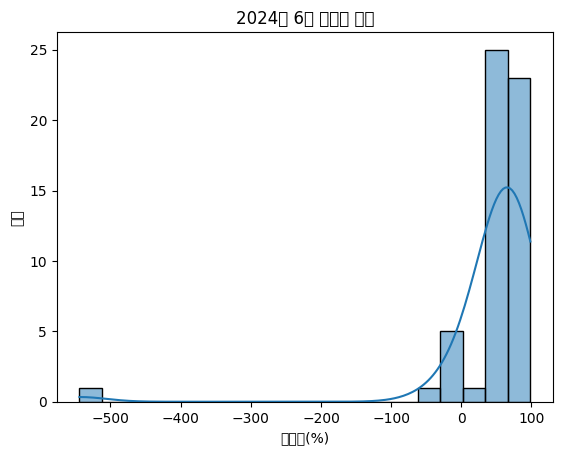

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

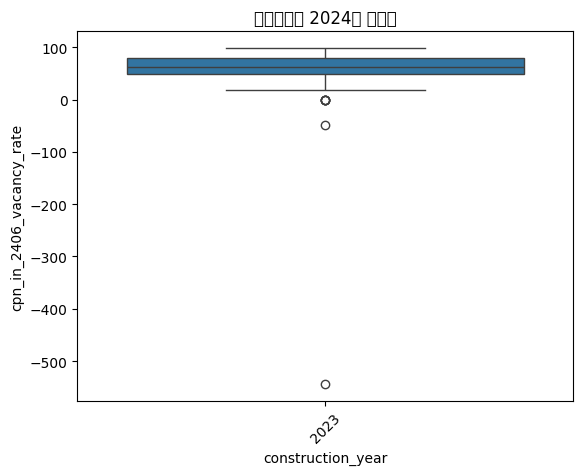

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# NaN 값 처리 (필요 시)
df = df.dropna(subset=['cpn_in_2406_vacancy_rate'])

# 공실률 히스토그램
sns.histplot(df['cpn_in_2406_vacancy_rate'], bins=20, kde=True)
plt.title('2024년 6월 공실률 분포')
plt.xlabel('공실률(%)')
plt.ylabel('빈도')
plt.show()

# 건축연도별 공실률 박스플롯
sns.boxplot(x='construction_year', y='cpn_in_2406_vacancy_rate', data=df)
plt.title('건축연도별 2024년 공실률')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 결측치 확인
print(df[['construction_year', 'cpn_in_2406_vacancy_rate']].isnull().sum())

# 결측치 제거
df = df.dropna(subset=['construction_year', 'cpn_in_2406_vacancy_rate'])


construction_year           0
cpn_in_2406_vacancy_rate    0
dtype: int64


In [ ]:
# construction_year가 숫자인지 확인 (문자라면 변환)
if df['construction_year'].dtype not in ['int64', 'float64']:
    df['construction_year'] = df['construction_year'].astype(str)

# cpn_in_2406_vacancy_rate가 숫자인지 확인
if df['cpn_in_2406_vacancy_rate'].dtype not in ['int64', 'float64']:
    df['cpn_in_2406_vacancy_rate'] = pd.to_numeric(df['cpn_in_2406_vacancy_rate'], errors='coerce')


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

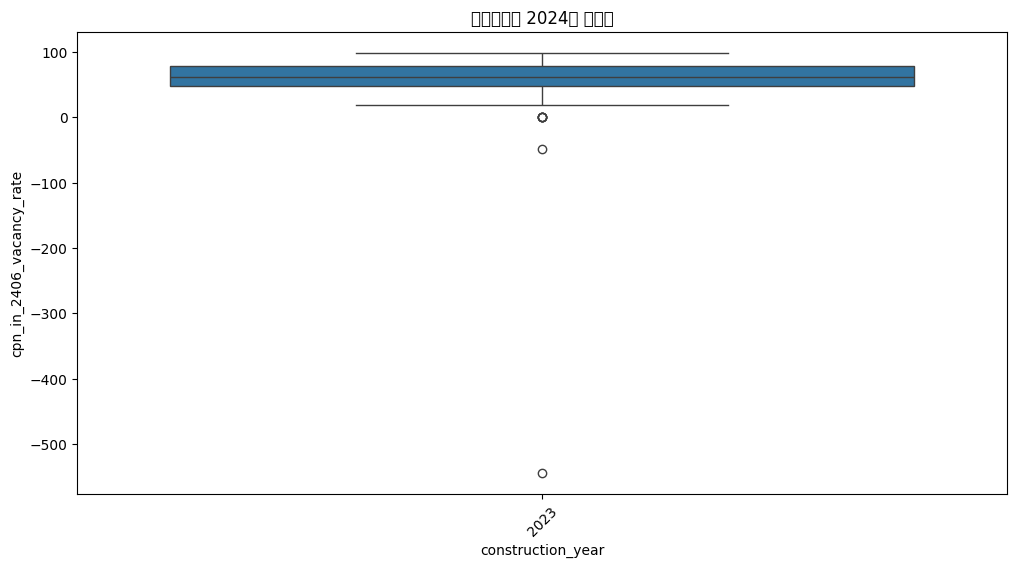

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='construction_year', y='cpn_in_2406_vacancy_rate', data=df)
plt.title('건축연도별 2024년 공실률')
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

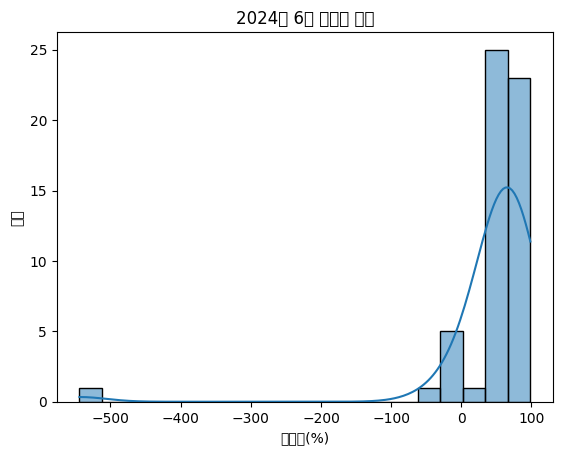

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/u

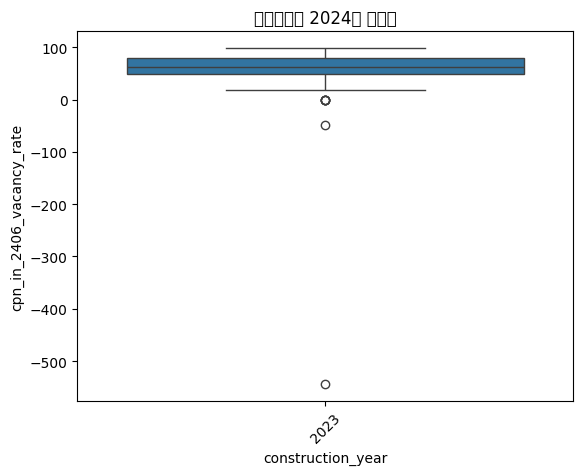

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 공실률 히스토그램
sns.histplot(df['cpn_in_2406_vacancy_rate'], bins=20, kde=True)
plt.title('2024년 6월 공실률 분포')
plt.xlabel('공실률(%)')
plt.ylabel('빈도')
plt.show()

# 건축연도별 공실률 박스플롯
sns.boxplot(x='construction_year', y='cpn_in_2406_vacancy_rate', data=df)
plt.title('건축연도별 2024년 공실률')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# 가공된 데이터 저장하기
df.to_csv('processed_지식산업센터.csv', index=False, encoding='utf-8-sig')

print("가공된 데이터가 'processed_지식산업센터.csv' 파일로 저장되었습니다.")


가공된 데이터가 'processed_지식산업센터.csv' 파일로 저장되었습니다.


In [ ]:
import pandas as pd

# 성남시 거주인구 데이터 불러오기
residents_df = pd.read_csv('1.성남시_거주인구.csv', encoding='utf-8-sig')
resident_df = pd.read_csv('processed_지식산업센터.csv', encoding='utf-8-sig')

# 데이터 확인
print(residents_df.info())
print(residents_df.head())

# 데이터 확인
print(resident_df.info())
print(resident_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58052 entries, 0 to 58051
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gid         58052 non-null  object 
 1   year        58052 non-null  int64  
 2   m_20g_pop   12861 non-null  float64
 3   w_20g_pop   12642 non-null  float64
 4   m_30g_pop   13146 non-null  float64
 5   w_30g_pop   12927 non-null  float64
 6   m_40g_pop   13125 non-null  float64
 7   w_40g_pop   12917 non-null  float64
 8   m_50g_pop   13445 non-null  float64
 9   w_50g_pop   13205 non-null  float64
 10  m_60g_pop   13642 non-null  float64
 11  w_60g_pop   13365 non-null  float64
 12  m_70g_pop   12438 non-null  float64
 13  w_70g_pop   12360 non-null  float64
 14  m_80g_pop   10297 non-null  float64
 15  w_80g_pop   11014 non-null  float64
 16  m_90g_pop   3810 non-null   float64
 17  w_90g_pop   7378 non-null   float64
 18  m_100g_pop  230 non-null    float64
 19  w_100g_pop  653 non-null 

In [ ]:
# 공실률이 높은 센터 확인
high_vacancy_centers = resident_df[resident_df['cpn_in_2406_vacancy_rate'] > 50]  # 공실률 50% 이상인 센터

# 공실률이 낮은 센터 확인
low_vacancy_centers = resident_df[resident_df['cpn_in_2406_vacancy_rate'] < 10]  # 공실률 10% 이하인 센터

# 지역별 공실률 평균
region_vacancy = resident_df.groupby('addr')['cpn_in_2406_vacancy_rate'].mean().sort_values(ascending=False)

# 건축 연도별 공실률 평균
construction_vacancy = resident_df.groupby('construction_year')['cpn_in_2406_vacancy_rate'].mean()

# 공실률과 건축 면적 간의 상관관계
corr_area_vacancy = resident_df[['arch_area', 'cpn_in_2406_vacancy_rate']].corr()

print("공실률이 높은 지식산업센터:")
print(high_vacancy_centers[['gbn', 'klg_ids_ct_nm', 'cpn_in_2406_vacancy_rate']])

print("\n공실률이 낮은 지식산업센터:")
print(low_vacancy_centers[['gbn', 'klg_ids_ct_nm', 'cpn_in_2406_vacancy_rate']])

print("\n지역별 공실률 평균:")
print(region_vacancy)

print("\n건축 연도별 공실률 평균:")
print(construction_vacancy)

print("\n건축 면적과 공실률 간의 상관관계:")
print(corr_area_vacancy)


공실률이 높은 지식산업센터:
         gbn klg_ids_ct_nm  cpn_in_2406_vacancy_rate
0         개별       분당테크노파크                 83.949192
2         개별       반도아이비밸리                 95.625000
3         개별  현대지식산업센터성남고등                 96.198830
4   도시첨단산업단지      LH기업성장센터                 53.658537
5   도시첨단산업단지      경기기업성장센터                 65.915493
6   도시첨단산업단지      판교이노베이션랩                 86.904762
7   도시첨단산업단지     성남글로벌융합센터                 84.615385
8   도시첨단산업단지      글로벌Biz센터                 82.677165
9   도시첨단산업단지        판교IT센터                 92.664093
10  도시첨단산업단지        SW드림타운                 98.412698
13    지방산업단지       중앙인더스피아                 62.500000
15    지방산업단지     중앙인더스피아2차                 64.285714
16    지방산업단지       노벨테크노타워                 54.545455
23    지방산업단지      금강하이테크밸리                 61.081081
24    지방산업단지          이노트리                 92.000000
25    지방산업단지        크란츠테크노                 61.707989
26    지방산업단지         시콕스타워                 61.403509
27    지방산업단지    금강하이테크밸리2차    